<a href="https://colab.research.google.com/github/walukas1/DeepDiveDSProjects/blob/main/Project_2_Housing_Walukas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing

##Notes

Next time trying this:
- Break out by neighborhood (MS Subclass or MS zoning)
- Box cox to scale skewed target data
- Identify the feature weight coefficients and keep only the strongest
- Lasso and ridgid regression may be applicable on this data set because of the large numbers (2637 rows)
  - Scale these values before using lasso or ridge

- Keep some categorical data and check their weights in comparison to strongest numerical features


---
---
## Problem Definition
Predict sales prices of houses based on specific features in order to most competatively and acurately sell or buy real estate.
<br/>
- Minimize the RMS percentage error ( root mean squared percentage error - RMSPE )
- Supervised due to the presence of a target
- Target is numerical
- Numerical/categorical data mix

###Guiding questions
- What is the business problem?  Often some variant of saving time, saving money, and/or making money.
  - predict whether or not a future customer will make a transaction based on their transaction data.
- What data science problem is this? ( supervised or unsupervised )

- If supervised ...
  - how did you determine what is the target? What is the target?
  - what statistical data type is the target: numerical or categorical?
  - would this be a classification or a regression problem?
- If unsupervised ...
  - what kind of clustering problem?


---
---
## Data Collection/Sources


###Guiding questions
- where is the data source located: local file, database, website, API, other?
  - https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv

- where is the data dictionary?
  - https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf
- how many bytes ( KB, MB, GB, TB ) is the data set?
  - dtypes: float64(11), int64(27), object(43)
  - memory usage: 1.6+ MB
- what tools did/would you use to get and read the data?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import datasets, metrics, model_selection

Load training data as csv file and convert to data frame

In [ ]:
train_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
train = pd.read_csv(train_path)

##IDA: Get to know the data set



Data frame
  - Elements in data frame:213597
  - Rows in data frame:2637
  - Columns in data frame:81
  - Nulls in data frame:14208
  - Duplicates in data frame:0
<br/>

Target
  - Count target:2637
  - Nulls in target:0
  - Count target:<class 'numpy.int64'>

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


Check **dataframe** for size, shape, nulls and duplicates

In [ ]:
#Check dataframe for size, shape, nulls and duplicates
rows, columns = train.shape
train_nulls = train.isnull().sum().sum()
duplicates = train.duplicated().sum()
print(f'Dataframe info\n Elements:                 {train.size}\n Rows in data frame:       {rows}\n Columns in data frame:    {columns}\n Nulls in data frame:      {train_nulls}\n Duplicates in data frame: {duplicates}')

Dataframe info
 Elements:                 213597
 Rows in data frame:       2637
 Columns in data frame:    81
 Nulls in data frame:      14208
 Duplicates in data frame: 0


In [ ]:
uniques = train.nunique().sort_values(ascending = True)
uniques[uniques<10]

,0
Street,2
Alley,2
Central Air,2
Paved Drive,3
Garage Finish,3
Utilities,3
Land Slope,3
Bsmt Half Bath,3
Half Bath,3
Fence,4


In [ ]:
#Find location of nulls missing 40% of data set
filter1 = train.isnull().sum() > rows * 0.4
train_category_nulls = train.isnull().sum()
drop_columns = train_category_nulls[filter1]
drop_column_names = list(drop_columns.index)
drop_columns

,0
Alley,2457
Mas Vnr Type,1607
Fireplace Qu,1284
Pool QC,2626
Fence,2109
Misc Feature,2541


In [ ]:
#Categories with only a few nulls (2% mising threshhold)
filter2 = (train.isnull().sum() > 0) & (train.isnull().sum() < rows * 0.02)
drop_rows = train_category_nulls[filter2]
drop_row_names = list(drop_rows.index)
drop_rows

,0
Mas Vnr Area,23
BsmtFin SF 1,1
BsmtFin SF 2,1
Bsmt Unf SF,1
Total Bsmt SF,1
Bsmt Full Bath,2
Bsmt Half Bath,2
Garage Cars,1
Garage Area,1


Check **target** for unique values and nulls and duplicates

In [ ]:
#Target column called 'SalePrice'
# target_values = train['SalePrice'].unique()
# print(f'Values in target: {target_values}')
target_nulls = train['SalePrice'].isnull().sum()
target_count = train['SalePrice'].count()
target_type = type(train['SalePrice'][1])
print(f' Count target:       {target_count}\n',
      f'Nulls in target:       {target_nulls}\n',
      f'Count target:   {target_type}')
train['SalePrice'].describe()

 Count target:       2637
 Nulls in target:       0
 Count target:   <class 'numpy.int64'>


,SalePrice
count,2637.000000
mean,179986.230186
std,78309.251522
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213000.000000
max,745000.000000


Histogram of target data
Shows minuum to tell if we can use MRSPE (non zero targets only)
Tells if data is continuous not discrete

(array([ 10., 118., 375., 794., 535., 299., 191., 117.,  85.,  43.,  33.,
         12.,  10.,   4.,   5.,   1.,   4.,   0.,   0.,   1.]),
 array([ 12789.  ,  49399.55,  86010.1 , 122620.65, 159231.2 , 195841.75,
        232452.3 , 269062.85, 305673.4 , 342283.95, 378894.5 , 415505.05,
        452115.6 , 488726.15, 525336.7 , 561947.25, 598557.8 , 635168.35,
        671778.9 , 708389.45, 745000.  ]),
 <BarContainer object of 20 artists>)

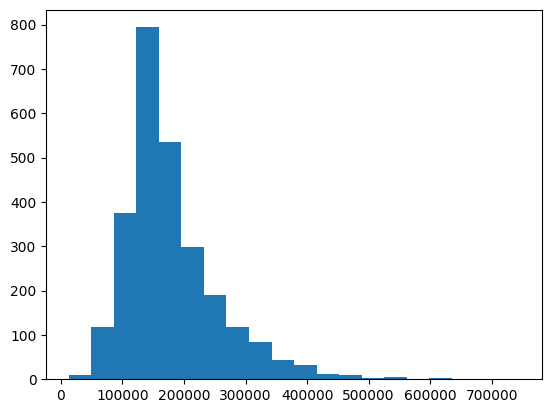

In [ ]:
plt.hist(train['SalePrice'], bins=20, label = "Sale Prices in target")

---
---
## Data Cleaning


###Guiding Questions
- how can/did you discover how many rows?
- how can/did you discover how many columns?
- how can/did you discover if there are any unique identifiers and how would/did you handle them?
- how can/did you discover if there are any nulls and how would/did you handle them?
- if supervised, how can/did you discover if there are any nulls in your target and how would/did you handle them?
- how can/did you discover if there are any duplicates and how would/did you handle them?
- how can/did you discover if there are any missing values and how would/did you handle them?
- how can/did you discover if there are any nested fields and how would/did you handle them?





### Tidy up!


Make a copy of data frame

In [ ]:
tidy_train = train.copy()
tidy_train_bak = tidy_train.copy()
tidy_train.head(n=1)
tidy_train.shape

(2637, 81)

Drop
  - columns ('PID' and all data sets with over 50% null data)
  - rows (all rows from colomns missing 2% or less of data)
  - categorical variables on first run

In [ ]:
#Drop columns (81-74 columns)
tidy_train.drop(drop_column_names + [tidy_train.columns[0]], axis = 'columns', inplace = True)
tidy_train.head(n=1)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,62.0,14299,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2007,WD,Normal,115400


In [ ]:
#Find null rows and drop (2637 - 2611 rows)
tidy_train[drop_row_names].isnull().sum() # Check nulls before drop
tidy_train.dropna(subset = drop_row_names, inplace = True)
tidy_train[drop_row_names].isnull().sum() # Check nulls after Drop
tidy_train.shape

(2611, 74)

Remaining mid null data
- How many nulls?
- What type?
- How many unique values in that row?

In [ ]:
#Find null rows and what they are
null_filter = tidy_train.isnull().sum() > 0
nulls= tidy_train.isnull().sum()
uniques = tidy_train.nunique()

df_mid_nulls = pd.concat([nulls, tidy_train.dtypes, uniques], axis=1)
df_mid_nulls.columns = ['Null Sum', 'Type', 'Uniques']
df_mid_nulls[null_filter]

,Null Sum,Type,Uniques
Lot Frontage,443,float64,125
Bsmt Qual,71,object,5
Bsmt Cond,71,object,5
Bsmt Exposure,74,object,4
BsmtFin Type 1,71,object,6
BsmtFin Type 2,72,object,6
Garage Type,144,object,6
Garage Yr Blt,145,float64,101
Garage Finish,145,object,3
Garage Qual,145,object,5


In [ ]:
# Drop mid null object columns (74-63)
more_column_drops = list(set(df_mid_nulls[null_filter].index) - set('Lot Frontage, Garage Yr Blt'))
tidy_train.shape

(2611, 74)

In [ ]:
drop_objects = list(tidy_train.select_dtypes(include = ['object']).columns)
simple_tidy_train = tidy_train.drop(drop_objects, axis = 1)
simple_tidy_train = simple_tidy_train.drop('MS SubClass', axis = 1) #Dropped MS SubClass as well because it is basically categorical
simple_tidy_train.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,62.0,14299,4,3,1964,1964,0.0,513.0,144.0,348.0,...,0,0,0,0,0,0,0,7,2007,115400
1,72.0,10791,4,5,1967,1967,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,500,10,2006,90000
2,50.0,9000,6,6,1937,1950,0.0,0.0,0.0,780.0,...,0,162,0,0,126,0,0,12,2007,141000
3,68.0,7379,8,5,2000,2000,0.0,484.0,0.0,491.0,...,280,184,0,0,0,0,0,4,2010,254000
4,60.0,7200,7,9,1936,2007,0.0,350.0,210.0,0.0,...,256,0,0,0,0,0,0,4,2009,155000


In [ ]:
# more_object_drops = simple_tidy_train.select_dtypes(include = 'object').columns ## ROUND 2: Remove this
# simple_tidy_train = simple_tidy_train.drop(more_object_drops, axis = 1, inplace = True)

In [ ]:
simple_tidy_train.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,62.0,14299,4,3,1964,1964,0.0,513.0,144.0,348.0,...,0,0,0,0,0,0,0,7,2007,115400
1,72.0,10791,4,5,1967,1967,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,500,10,2006,90000
2,50.0,9000,6,6,1937,1950,0.0,0.0,0.0,780.0,...,0,162,0,0,126,0,0,12,2007,141000
3,68.0,7379,8,5,2000,2000,0.0,484.0,0.0,491.0,...,280,184,0,0,0,0,0,4,2010,254000
4,60.0,7200,7,9,1936,2007,0.0,350.0,210.0,0.0,...,256,0,0,0,0,0,0,4,2009,155000


In [ ]:
#Drop discretes and low unique values
uni_filter = simple_tidy_train.nunique() < 50
drop_discretes = simple_tidy_train.nunique()[uni_filter].index
simple_tidy_train = simple_tidy_train.drop(drop_discretes, axis = 1)
simple_tidy_train.shape

(2611, 19)

Check nulls one more time

Find Lot Frontage and Garage Year Built have nulls

They are probably going to have a correlation to Lot area and Year house built soooo.... maybe I'll leave them in and drop them after I check correlation pairs

In [ ]:
simple_tidy_train.isnull().sum()[simple_tidy_train.isnull().sum()>0]

,0
Lot Frontage,443
Garage Yr Blt,145


---
---
## Exploratory Data Analysis


###Guiding Questions
- if supervised, what data type is your target?  What does that suggest for the type of ML process you will use?
- what is the distribution of values for your target?
- how can/did you discover which fields are categorical?
- how can/did you discover which fields are numerical?
- for each field, what is the distribution?
- how can/did you discover the relationship between any two variables?




In [ ]:
simple_tidy_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2168.0,69.092712,23.330676,21.0,58.0,68.0,80.0,313.0
Lot Area,2611.0,10024.214477,6716.767206,1300.0,7420.0,9434.0,11506.0,164660.0
Year Built,2611.0,1971.045193,30.279773,1872.0,1954.0,1973.0,2000.0,2010.0
Year Remod/Add,2611.0,1984.033704,20.913039,1950.0,1965.0,1993.0,2004.0,2010.0
Mas Vnr Area,2611.0,102.004979,179.648163,0.0,0.0,0.0,164.0,1600.0
BsmtFin SF 1,2611.0,438.348525,449.168491,0.0,0.0,368.0,732.0,5644.0
BsmtFin SF 2,2611.0,51.443891,173.209614,0.0,0.0,0.0,0.0,1526.0
Bsmt Unf SF,2611.0,554.515128,435.693710,0.0,217.5,463.0,796.0,2336.0
Total Bsmt SF,2611.0,1044.307545,429.209358,0.0,790.0,988.0,1288.0,6110.0
1st Flr SF,2611.0,1153.947147,378.509632,334.0,877.5,1082.0,1377.5,4692.0


Histograms of all variables

Checking the normal distribution of each variable is essential for linear reg

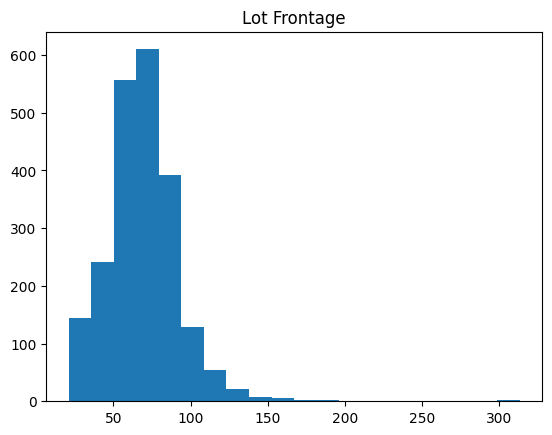

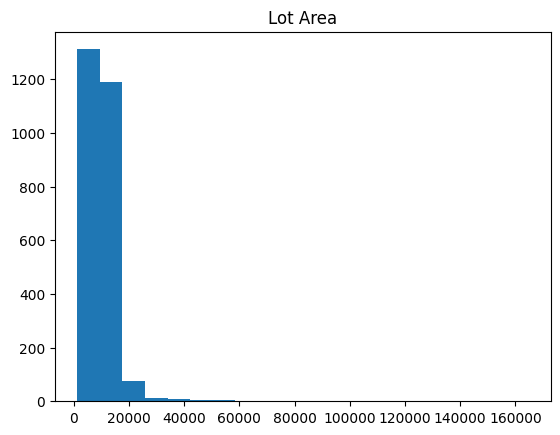

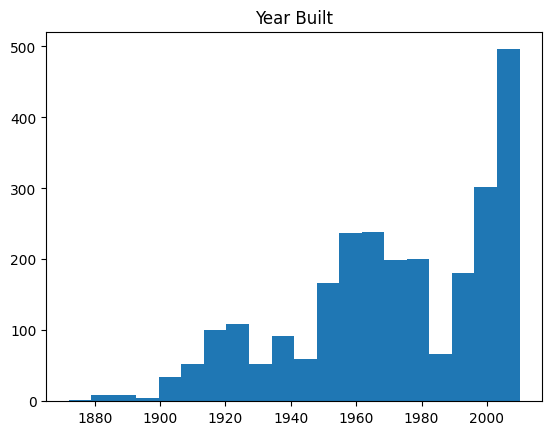

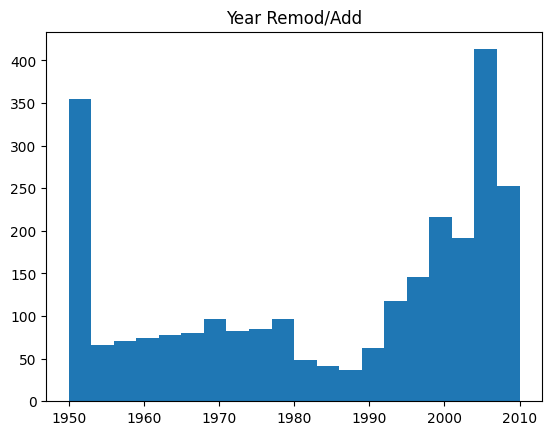

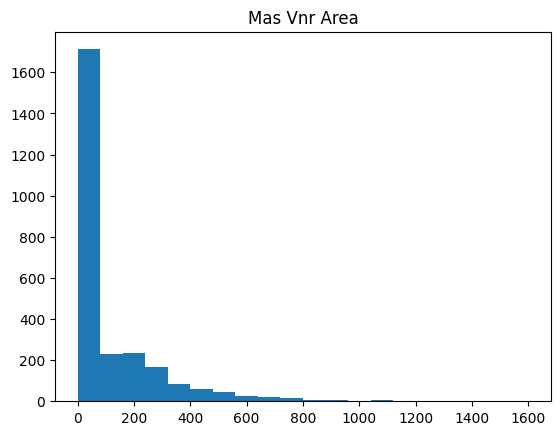

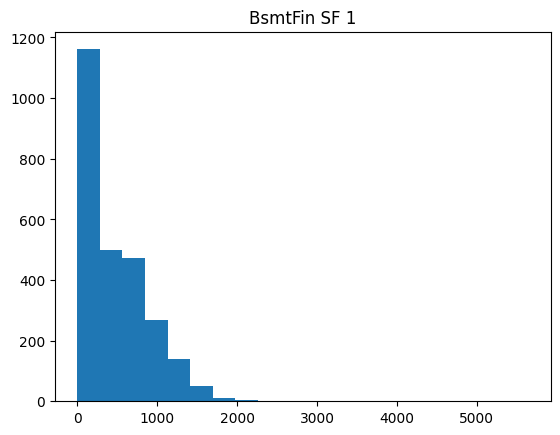

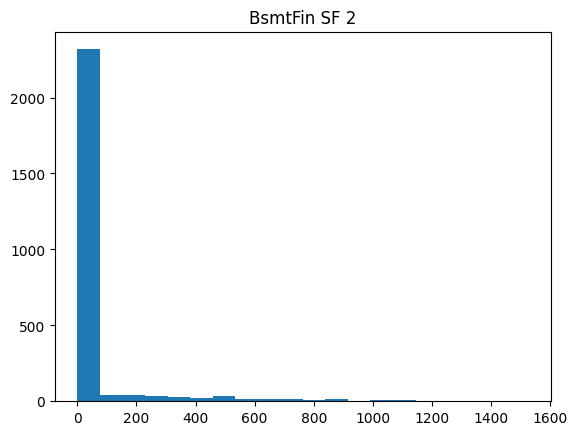

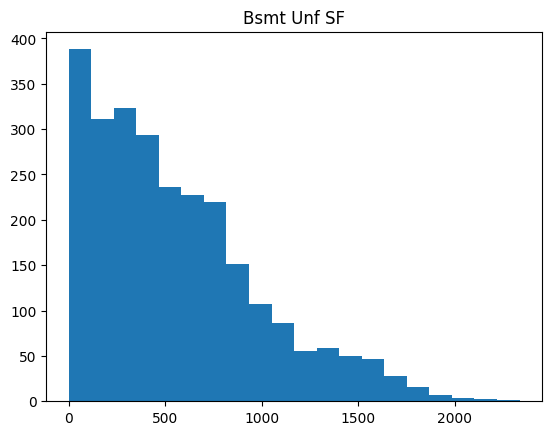

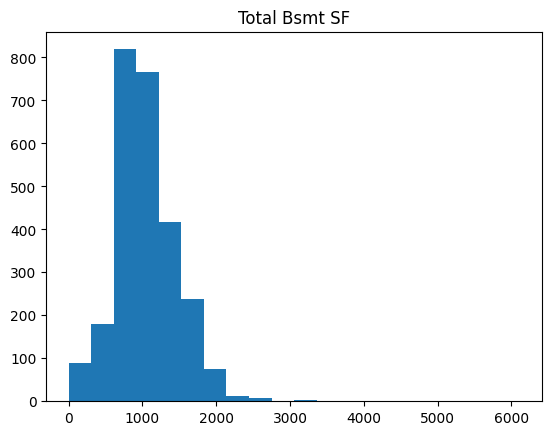

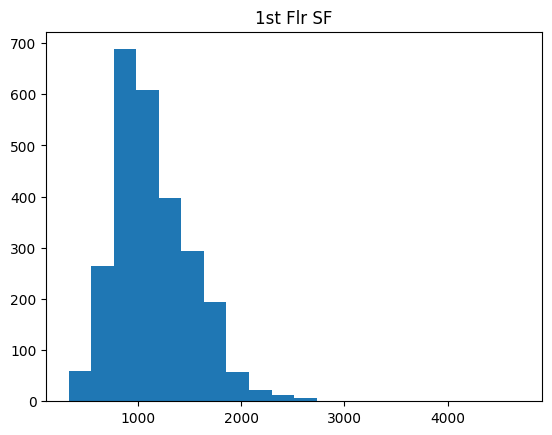

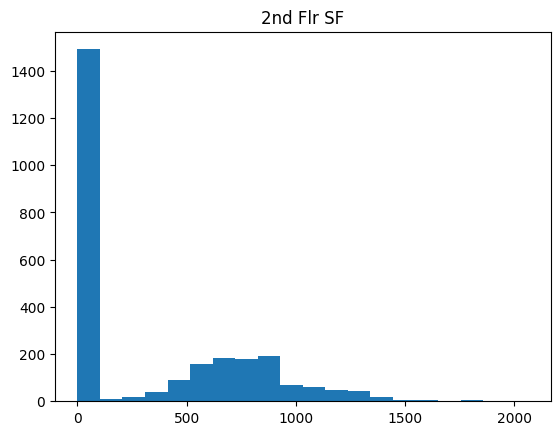

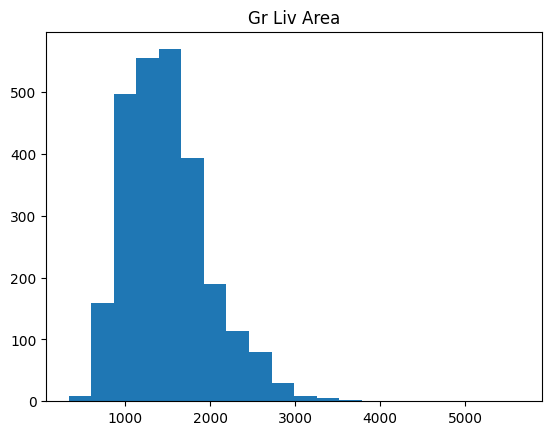

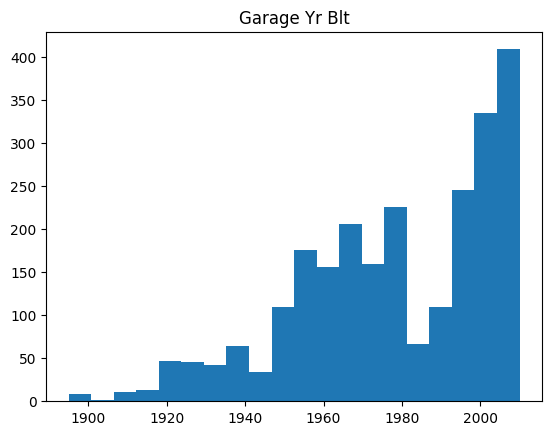

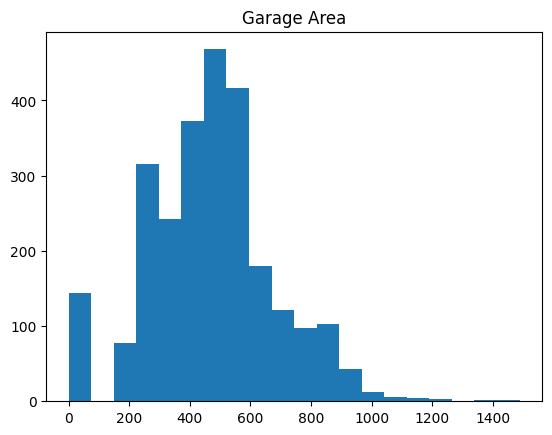

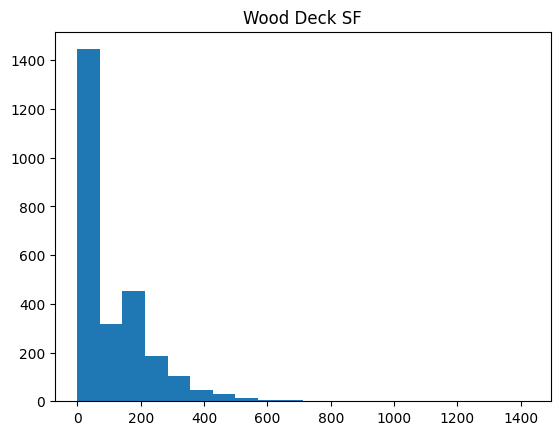

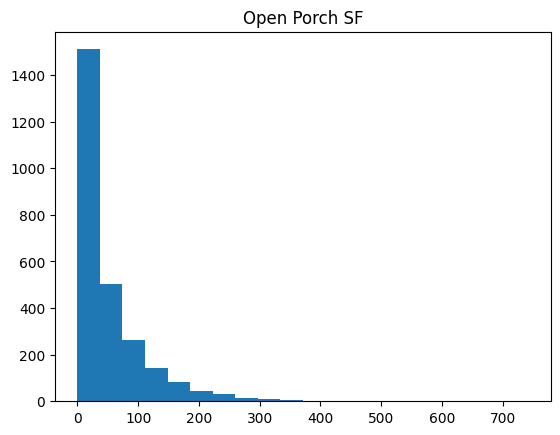

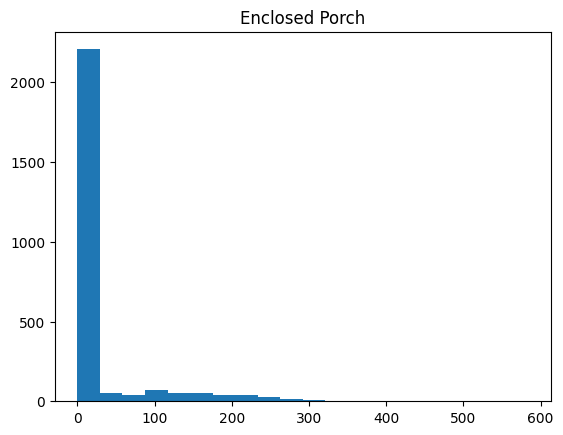

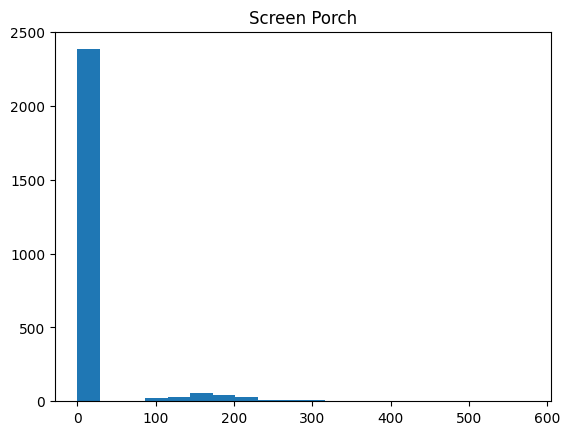

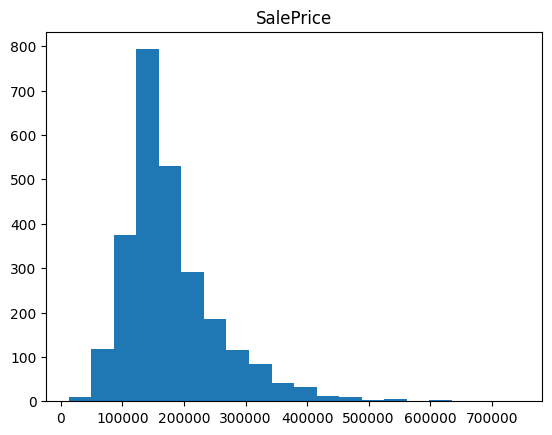

In [ ]:
for i in simple_tidy_train.columns:
  plt.hist(simple_tidy_train[i], bins = 20)
  plt.title(i)
  plt.show()

Correlation heat map/Pair plot if low # of variables

Check the correlation values between all predictor columns to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using linear reg

<Axes: >

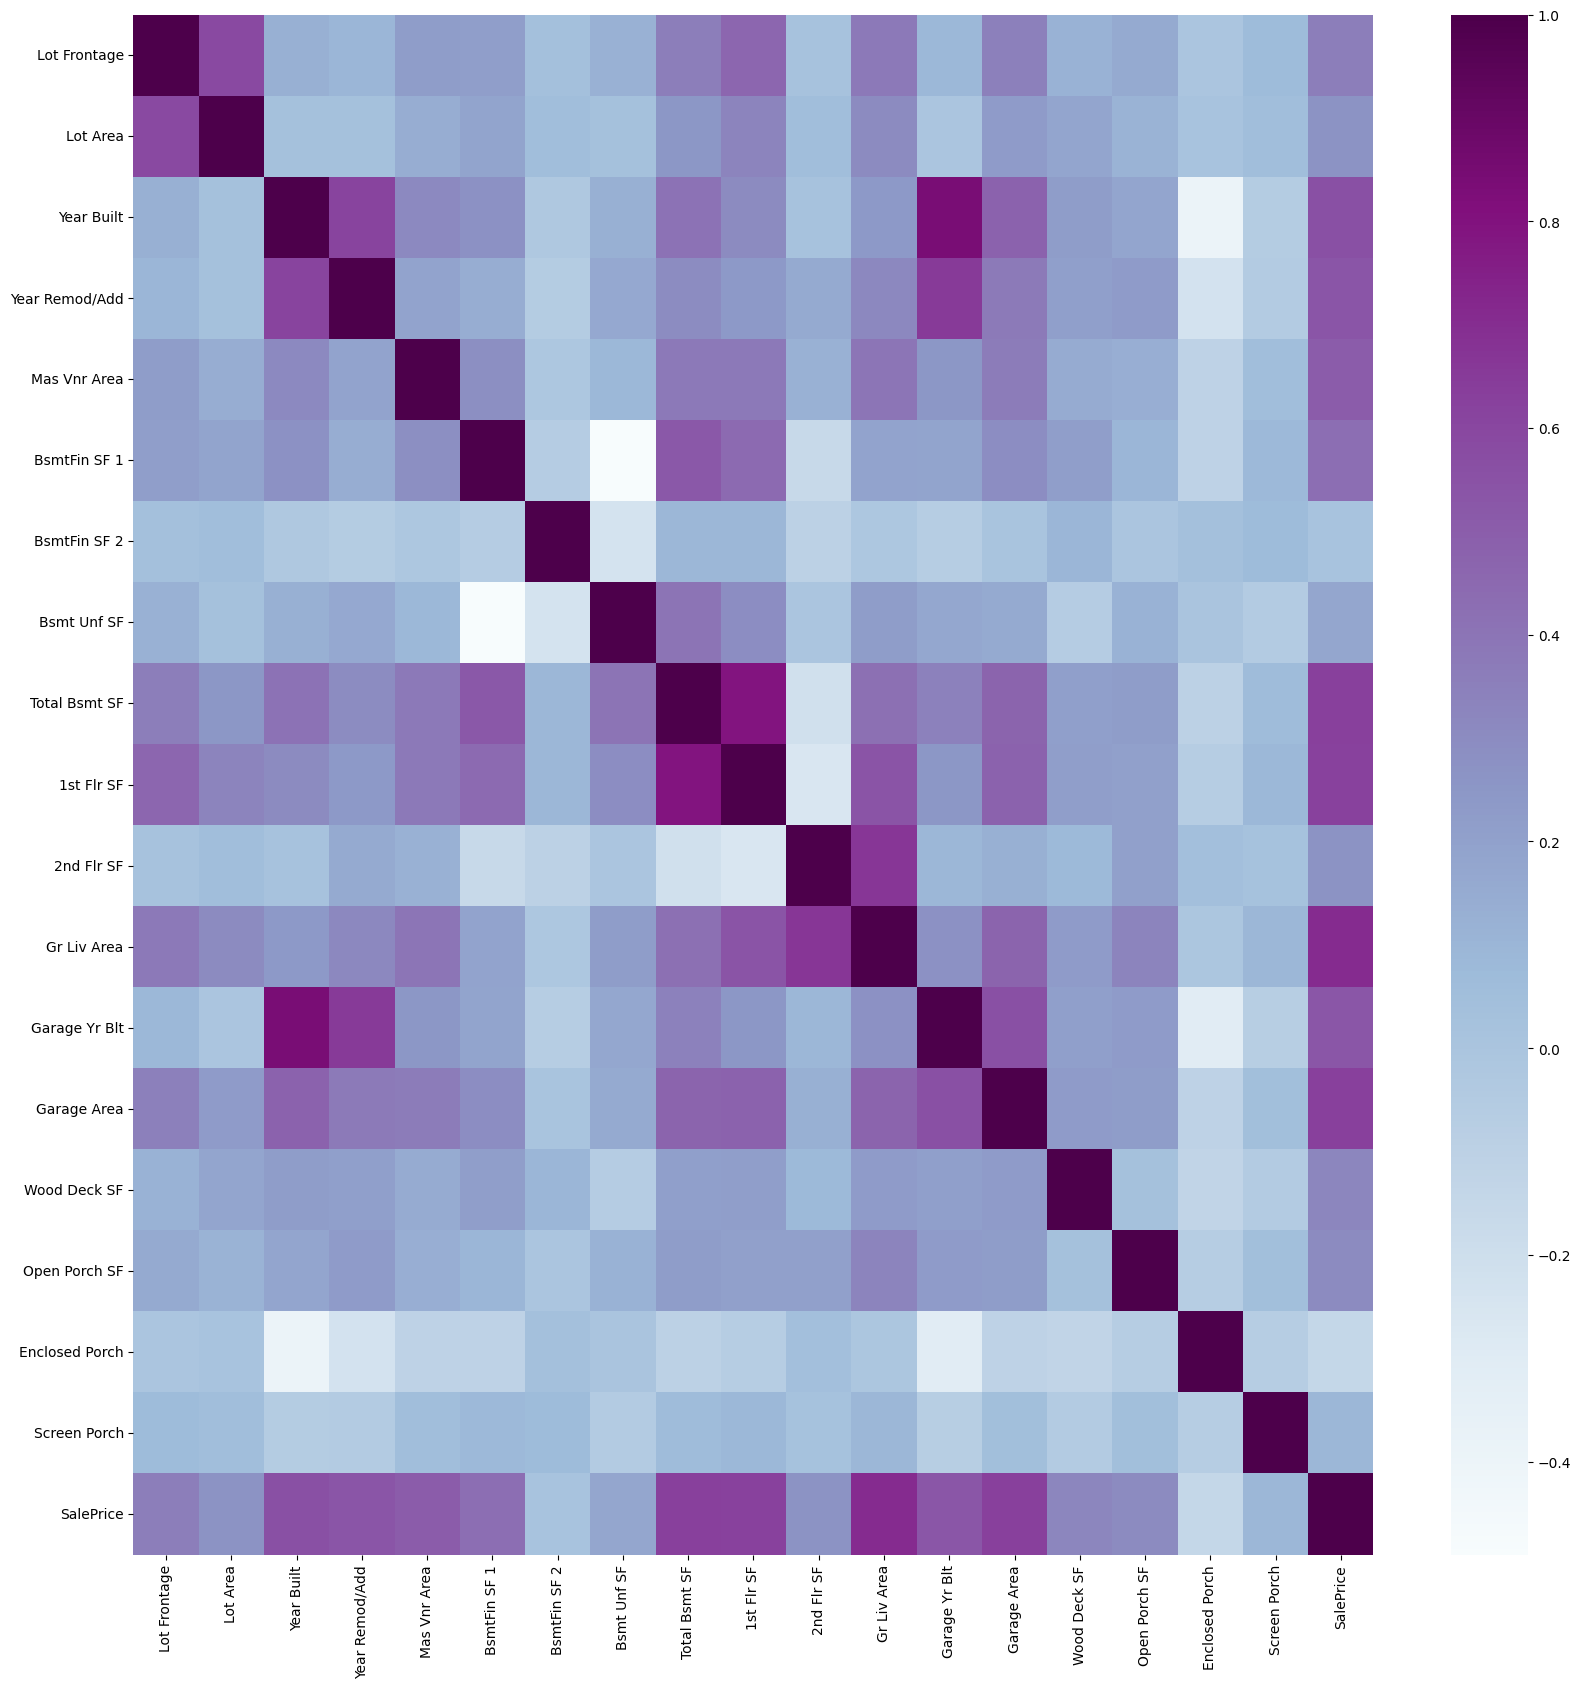

In [ ]:
corr = simple_tidy_train.corr()
corr
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='BuPu')

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))
lower_triangle = corr.mask(mask)
lower_triangle

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Garage Yr Blt,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,SalePrice
Lot Frontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Area,0.591532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year Built,0.129106,0.032180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year Remod/Add,0.103070,0.032299,0.611947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Area,0.224374,0.139178,0.309804,0.194740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFin SF 1,0.216021,0.190212,0.274296,0.144029,0.285819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFin SF 2,0.035188,0.056990,-0.024841,-0.054839,-0.013742,-0.061374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bsmt Unf SF,0.121400,0.029822,0.128273,0.166211,0.087231,-0.489872,-0.239026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Bsmt SF,0.359415,0.252328,0.407238,0.297318,0.382113,0.524462,0.096691,0.405996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st Flr SF,0.461878,0.336456,0.305732,0.239265,0.383056,0.441894,0.092832,0.291458,0.795767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Find what features are strongly correlated with each other. For linear reg, features should not be correlated to one another

In [ ]:
#Correlation Pair Table
corr_pair = (
  lower_triangle[ lower_triangle.abs() > 0.50]
  .drop( "SalePrice" )
  .unstack()
  .dropna()
  .sort_values( ascending = False )
)

corr_pair.reset_index()

,level_0,level_1,0
0,Year Built,Garage Yr Blt,0.840101
1,Total Bsmt SF,1st Flr SF,0.795767
2,2nd Flr SF,Gr Liv Area,0.667847
3,Year Remod/Add,Garage Yr Blt,0.655370
4,Year Built,Year Remod/Add,0.611947
5,Lot Frontage,Lot Area,0.591532
6,Garage Yr Blt,Garage Area,0.561652
7,1st Flr SF,Gr Liv Area,0.541083
8,BsmtFin SF 1,Total Bsmt SF,0.524462


This shows that
*   Year built and** Garage year built **
*   Total basement area and 1st floor area
*   2nd floor and garage living area
*   Year remodeled and **garage yr built**
*   Year built and **Year remodeled**
*   **Lot frontage** area and lot area

Probably drop
- garage yr built
- Year remodeled
- Lot frontage



In [ ]:
simple_tidy_train = simple_tidy_train.drop(['Garage Yr Blt','Lot Frontage', 'Year Remod/Add','Total Bsmt SF'], axis = 1)

In [ ]:
simple_tidy_train.columns

Index(['Lot Area', 'Year Built', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', 'Screen Porch', 'SalePrice'],
      dtype='object')

Check for correlation with target ????


In [ ]:
corr_target = (
  lower_triangle.loc["SalePrice"]
  .dropna()
  .sort_values( ascending = False )
)
corr_target.reset_index()

,index,SalePrice
0,Gr Liv Area,0.707150
1,Garage Area,0.632404
2,Total Bsmt SF,0.631127
3,1st Flr SF,0.622538
4,Year Built,0.562608
5,Year Remod/Add,0.538970
6,Garage Yr Blt,0.534293
7,Mas Vnr Area,0.506778
8,BsmtFin SF 1,0.428710
9,Lot Frontage,0.356058


<Axes: >

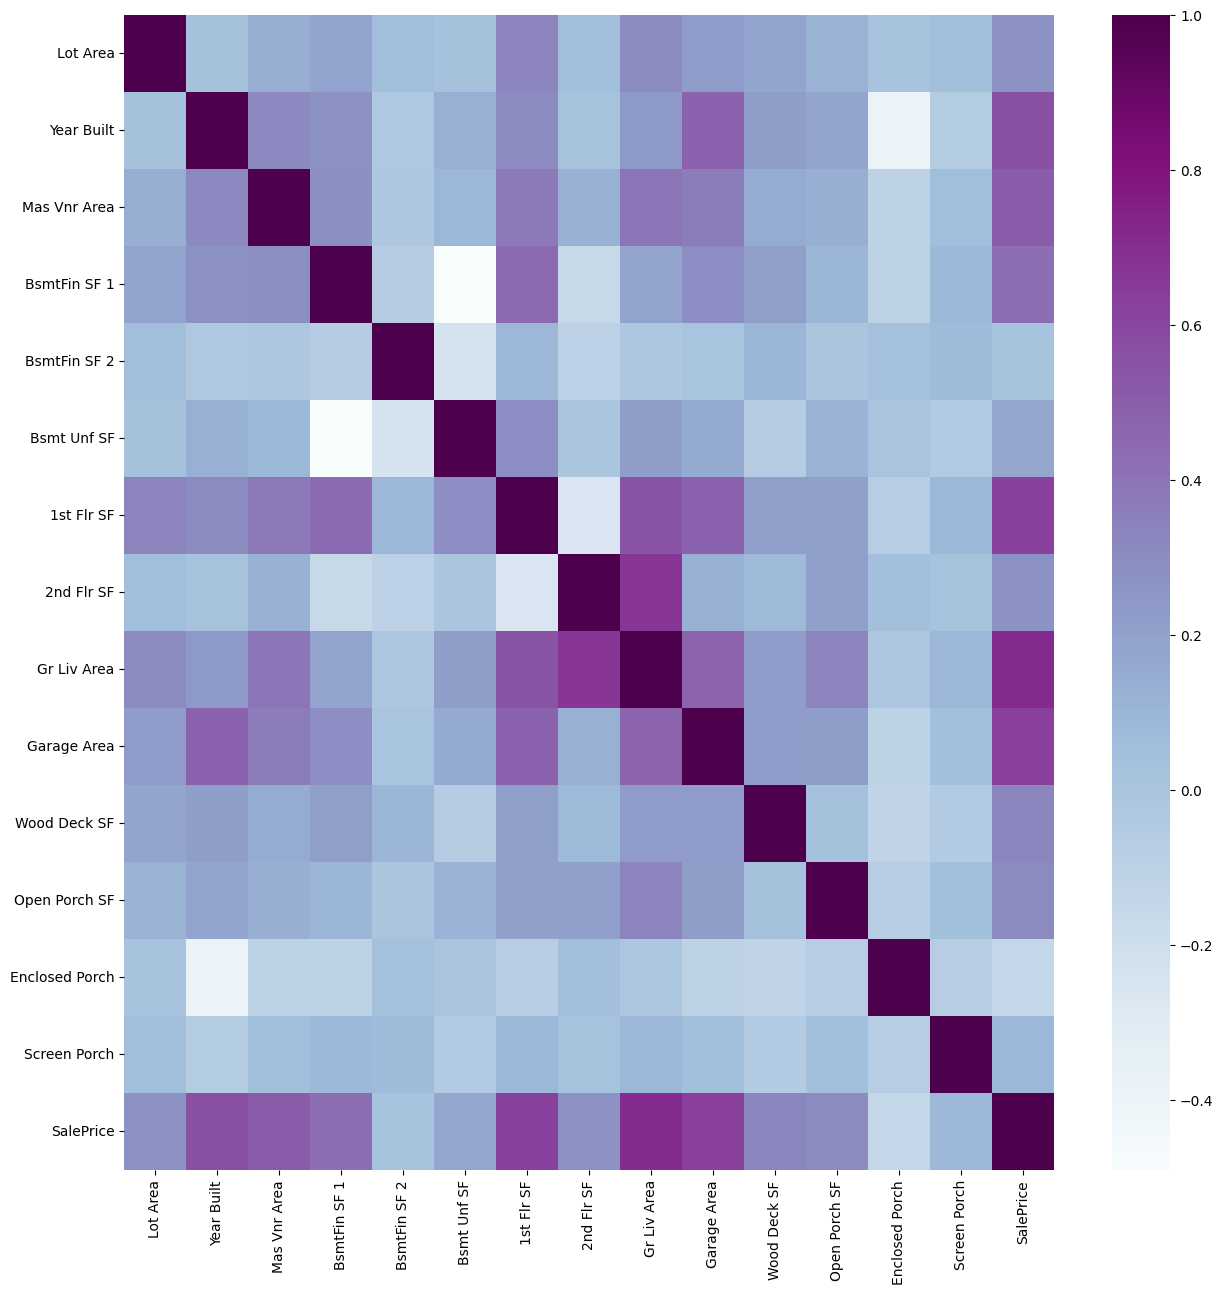

In [ ]:
corr = simple_tidy_train.corr()
corr
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='BuPu')

---
---
## Processing


- what questions did you ask to determine which ML process to use?
  - linear, lasso and ridge regressions, pick best (lowest) RMSE

- how did/can you determine what performance metric to use?  What others could you have used?  Which metrics might not be appropriate?

- how did/can you account for the variance/bias trade-off?


**Notes**
- Feature selection and take out noise








In [ ]:
simple_tidy_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lot Area,2611.0,10024.214477,6716.767206,1300.0,7420.0,9434.0,11506.0,164660.0
Year Built,2611.0,1971.045193,30.279773,1872.0,1954.0,1973.0,2000.0,2010.0
Mas Vnr Area,2611.0,102.004979,179.648163,0.0,0.0,0.0,164.0,1600.0
BsmtFin SF 1,2611.0,438.348525,449.168491,0.0,0.0,368.0,732.0,5644.0
BsmtFin SF 2,2611.0,51.443891,173.209614,0.0,0.0,0.0,0.0,1526.0
Bsmt Unf SF,2611.0,554.515128,435.693710,0.0,217.5,463.0,796.0,2336.0
1st Flr SF,2611.0,1153.947147,378.509632,334.0,877.5,1082.0,1377.5,4692.0
2nd Flr SF,2611.0,336.283033,427.420639,0.0,0.0,0.0,704.0,2065.0
Gr Liv Area,2611.0,1494.749138,494.013119,334.0,1126.0,1440.0,1737.5,5642.0
Garage Area,2611.0,470.360398,213.012807,0.0,322.5,478.0,576.0,1488.0


##Cross Validation


Linear regression

In [ ]:
# Define X features and y target
y = simple_tidy_train['SalePrice'] #Target data frame (y)
X = simple_tidy_train.drop('SalePrice', axis=1, inplace=False) #Train dataframe (x)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
#       1 Train/test split
#         - (X_train, y_train, X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=2)

#       2. Create empty model
#         -linear reg (pearson)
model = LinearRegression()

In [ ]:
#       3. Train model
# myfit = sm.OLS(y_train, X_scaled).fit() #OLS Ordinary Least squares
myfit.summary()
myfit2 = model.fit(X_scaled, y_train)

( myfit2.intercept_ , myfit2.coef_ ) ##What is this? Weights of features???

ValueError: Found input variables with inconsistent numbers of samples: [2611, 2088]

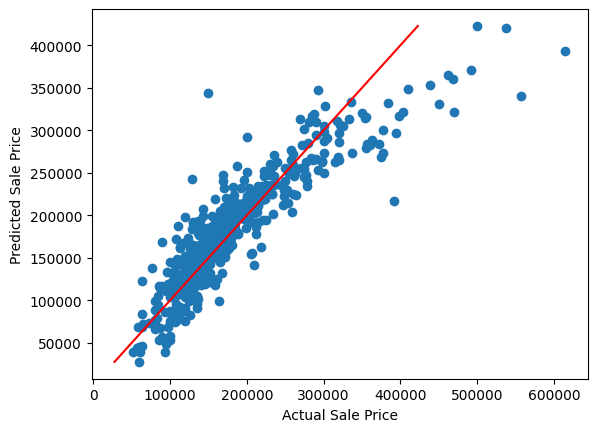

In [ ]:
#       4. Predict with testing data vs target
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price') ;

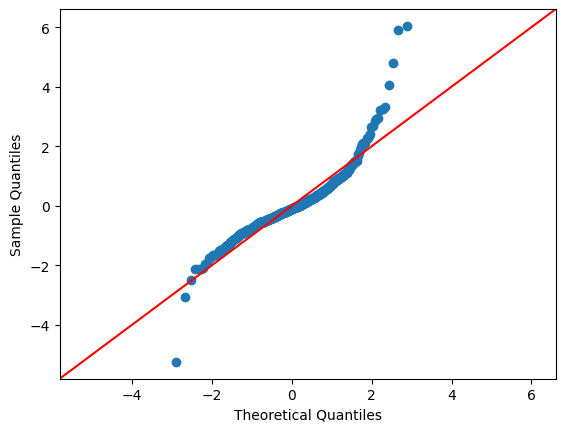

In [ ]:
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

In [ ]:
list(zip(y_test,y_pred))[:20]

[(450000, 330584.4703943145),
 (158000, 167196.23994094972),
 (231000, 235974.35953097465),
 (123000, 103613.30068753194),
 (172500, 169193.92059269478),
 (178000, 168410.9344342202),
 (168500, 161586.23199601378),
 (293000, 253842.2904325605),
 (112500, 124249.01377851516),
 (128500, 122059.05637829984),
 (169000, 156580.9846219169),
 (144000, 156943.72665759013),
 (258000, 265668.83579098666),
 (143000, 172686.03966741124),
 (149000, 157317.13334348123),
 (244600, 236006.22963850643),
 (468000, 360240.9762343373),
 (305000, 290627.1260832879),
 (85000, 94226.97903762246),
 (170000, 180711.20189782674)]

In [ ]:
def rmspe(y_true, y_pred):
  '''Calulates the root mean square percent error based on a predicted target and actual target inputs'''
  return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))

In [ ]:
#      5. Performamce metric
error = rmspe(y_test, y_pred)
print(f"RMSPE: {round(error*100,2)} %")

RMSPE: 20.49 %


Regression loop

Collect and view mean accuracy score as well as a histogram

In [ ]:
# Use cross validation to assess model performance
# results = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 10)
accuracy_scores=[]

for i in range(0,1000):
#       1 Train/test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=i)
#       2. Create empty model
  model = LinearRegression()
#       3. Train model
  myfit = sm.OLS(y_train, X_train).fit() #OLS Ordinary Least squares
  myfit.summary()
  myfit2 = model.fit(X_train, y_train)
  ( myfit2.intercept_ , myfit2.coef_ ) ##What is this? Weights of features???

#       4. Predict with testing data vs target
  y_pred = myfit2.predict(X_test)

#      5. Performamce metric
  error = round(rmspe(y_test, y_pred),5)
  accuracy_scores.append(error)

accuracy_scores
print(f"CV 100 RMSPE: {np.mean(accuracy_scores)*100} %")

CV 100 RMSPE: 26.460011 %


Text(0.5, 1.0, 'Accuracy Scores')

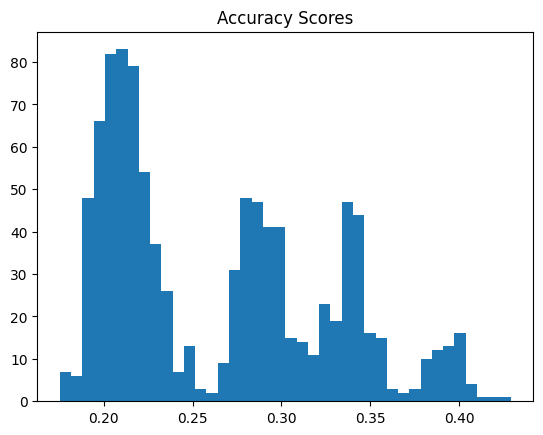

In [ ]:
#print(round(accuracy_scores.mean(), 5)*100)
plt.hist(accuracy_scores, bins = 40)
plt.title('Accuracy Scores as decimal percent')



---


**Second Run**:
Add back deleted features (feature labeling)
Do additional regressions (Lasso and scaling??)

---
---
## Data Visualization/Communication of Results
1. Compare the results of your cross-validation with the whole training data and the reduced 50/50 training data
1. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report)

- what plots did you use?  What did they show? What other visualizations could you have used?
- what could/should have been done to improve your performance metric?
- what constraints did you have while doing this project?  How could they be alleviated/mitigated?
- had you more resources, what else could you have done?
- what are your next steps?
